In [1]:

import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import pickle
import scipy

In [7]:


spacing = 0.005     # spacing of cells on the lattice [mm]
delta = spacing 
N = 512             # number of neurons in each layer [1]
L =  N * delta      #300 * 0.005
speed =  0.8        # speed [mm/s]
dt = 0.001          # integration time step [s]
T = int(L/speed/dt)

In [8]:

def compute_spatiotemporal_frequencies(signal, dt, delta):

    # # Perform a 2D Fourier Transform on the signal
    ft_signal = np.fft.fft2(signal)

    # # Shift the zero frequency component to the center
    ft_signal= np.fft.fftshift(ft_signal)

    # # Compute the magnitude (for visualization)
    # magnitude_spectrum = np.abs(ft_signal_shifted)
    
    # Get the frequency components along each dimension
    spatial_freqs = np.fft.fftfreq(signal.shape[0], d=dt)
    temporal_freqs = np.fft.fftfreq(signal.shape[1], d = delta)

    # return spatial_freqs, temporal_freqs, magnitude_spectrum
    return spatial_freqs, temporal_freqs, ft_signal


def ghat(omega,k, v, L, s2 = -1):
    return 1j * (np.exp((-1j * (omega-k*v*s2) * (L/v)) -1) /(omega-k*v*s2) )


# def extract_resonance_speed(magnitudes): 
#     N,tps = magnitudes.shape
#     max_idx = magnitudes.argmax()
#     spacemax = max_idx // tps
#     timemax = max_idx % tps
#     return (spacemax*0.005)/(timemax*0.001) #mm/s


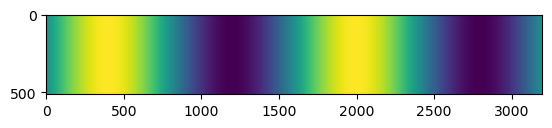

In [40]:
signal = np.zeros((N,T))
x, y = np.meshgrid(np.arange(T), np.arange(N))

ft = 2
grat = np.sin((2*np.pi/T) * ft * x)
plt.imshow(grat)

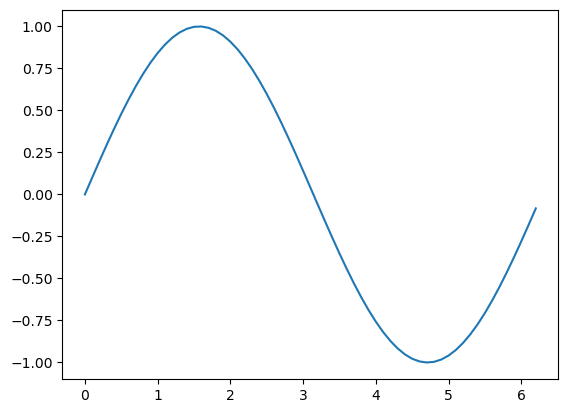

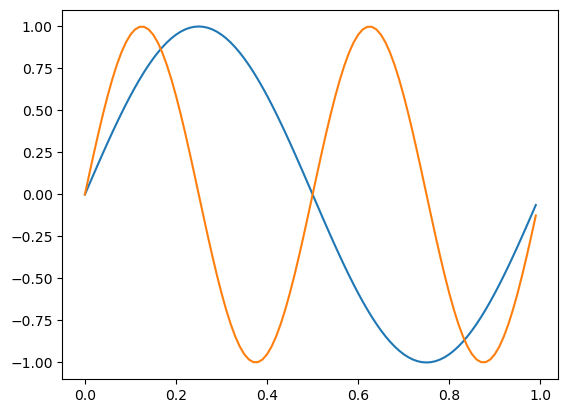

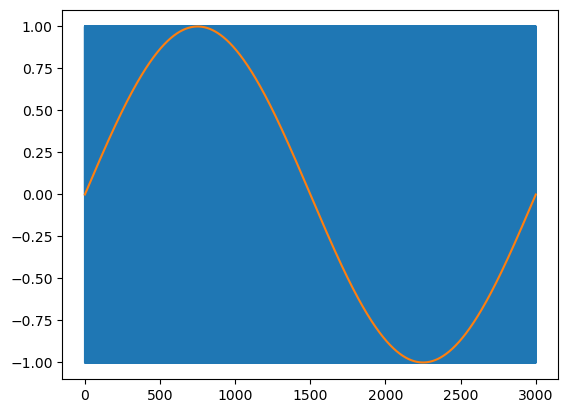

In [38]:
x = np.arange(0,2*np.pi,0.1)
plt.plot(x,np.sin(x))
plt.figure()
x = np.arange(0,1,0.01)
plt.plot(x,np.sin(2*np.pi*x))
plt.plot(x,np.sin(2*np.pi*x*2))

plt.figure()
x = np.arange(0,3000,0.01)
plt.plot(x,np.sin(2*np.pi*x))
plt.plot(x,np.sin(2*np.pi*x/3000))

Text(0.0, 1.0, '$V_{B}$')

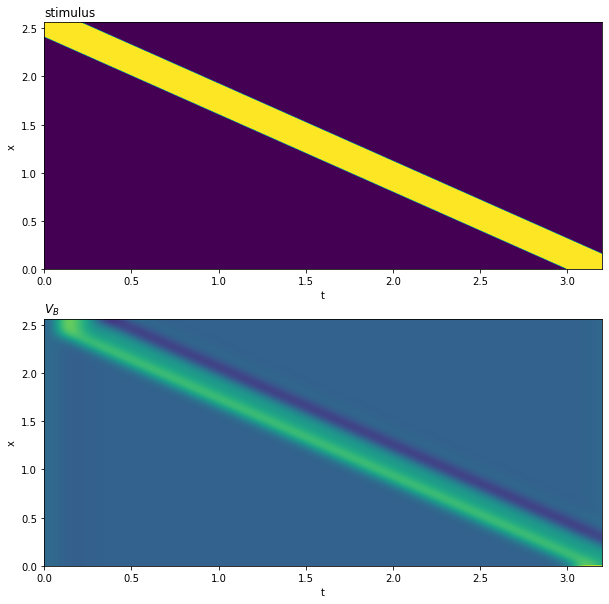

In [37]:
fig = plt.figure(figsize = (10,10))
gs = fig.add_gridspec(2,1)

ax = fig.add_subplot(gs[0,0])
ax.imshow(stim,extent=(0, T*dt, 0, L), aspect='auto')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title('stimulus', loc = 'left')

ax = fig.add_subplot(gs[1,0])
ax.imshow(signal,extent=(0, T*dt, 0, L), aspect='auto')
ax.set_xlabel('t')
ax.set_ylabel('x')
ax.set_title(r'$V_{B}$', loc = 'left')


In [38]:

# spatial_freqs, temporal_freqs, magnitude_spectrum = compute_spatiotemporal_frequencies(signal, dt = dt, delta = delta)
spatial_freqs, temporal_freqs, fts = compute_spatiotemporal_frequencies(signal, dt = dt, delta = delta)

omega_range = np.linspace(temporal_freqs.max(), temporal_freqs.min(), len(spatial_freqs))
krange_range = np.linspace(spatial_freqs.max(), spatial_freqs.min(), len(temporal_freqs))


omega_mat = np.zeros((len(spatial_freqs),len(temporal_freqs)))
k_mat = np.zeros((len(spatial_freqs),len(temporal_freqs)))

for row in range(len(krange_range)):
    omega_mat[:,row] = omega_range

for col in range(len(omega_range)):
    k_mat[col,:] = krange_range


ghat_mat  =ghat(omega_mat,k_mat,speed,L)
df = fts/ghat_mat

Text(0.5, 1.0, 'spectrum / g_hat')

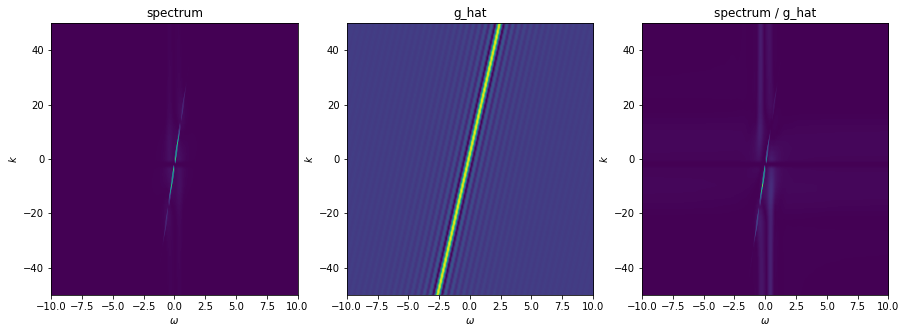

In [41]:
fig = plt.figure(figsize = (15,5))
gs = fig.add_gridspec(1,3)



ax = fig.add_subplot(gs[0,0])
ax.imshow(np.abs(fts),extent=(temporal_freqs.min(), temporal_freqs.max(), spatial_freqs.min(), spatial_freqs.max()), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-50,50)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('spectrum')

ax = fig.add_subplot(gs[0,1])
ax.imshow(ghat_mat.real,extent=(temporal_freqs.min(), temporal_freqs.max(), spatial_freqs.min(), spatial_freqs.max()), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-50,50)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('g_hat')


ax = fig.add_subplot(gs[0,2])
ax.imshow(np.abs(df),extent=(temporal_freqs.min(), temporal_freqs.max(), spatial_freqs.min(), spatial_freqs.max()), aspect='auto')
ax.set_xlim(-10,10)
ax.set_ylim(-50,50)

ax.set_xlabel(r'$\omega$')
ax.set_ylabel(r'$k$')

ax.set_title('spectrum / g_hat')


In [ ]:
# match amplitudes ?
# transform into right frequencies ? 